---------------------------------------------

## Checkdata

In [4]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/usr/local/lib/python3.9/site-packages')
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# we have no  timestamp type of  column in xls document
df_delivery = pd.read_csv('/Users/bruce/Library/CloudStorage/OneDrive-Личная/DocumentsMacOneDrive/Karpov.Course1/Stat_module/lesson4/experiment_lesson_4.csv', sep = ',' )
df_delivery.tail(2)


#COMMON DATE ABOUT DF
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




                                                        ОБЩИЕ СВЕДЕНИЯ О ДАННЫХ

In [5]:
df_delivery.shape
df_delivery.isna().sum()
df_delivery.dtypes
df_delivery.delivery_time.describe()

(20196, 4)

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

count    20196.000000
mean        42.054169
std         10.382196
min         10.000000
25%         35.000000
50%         42.000000
75%         49.000000
max         83.000000
Name: delivery_time, dtype: float64

                    СМОТРЮ ЧАСТОТНОЕ РАСПРЕДЕЛЕНИЕ ЗАКАЗОВ ПО ТРЕМ РАЙОНАМ  В ТЕСТОВОЙ И КОНТРОЛЬНОЙ ГРУППЕ




district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

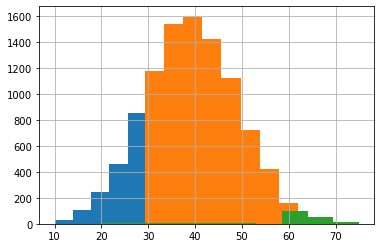

In [7]:
#1)     test group

df_delivery.query('experiment_group =="test"').groupby('district').delivery_time.hist()


district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

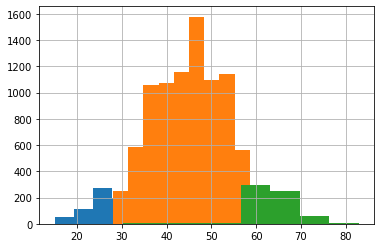

In [8]:
# 2) control group
df_delivery.query('experiment_group =="control"').groupby('district').delivery_time.hist()

In [9]:
#видим что район Purlieus самый популярный в доставке заказов, с большим отрывом.
df_delivery.groupby('district').experiment_group.count()

district
Central      2396
Purlieus    16960
Suburb        840
Name: experiment_group, dtype: int64

                                 СМОТРЮ ИМЕЕТСЯ ЛИ СИЛЬНОЕ РАЗЛИЧИЕ В КОЛ НАБЛЮДЕНИЙ В ВЫБОРКАХ
    
    
    

In [10]:
df_delivery.query('experiment_group == "control"').describe()[:1]
df_delivery.query('experiment_group == "test"').describe()[:1]

# вот с помощью мтоедоа diff ( можно узнать разницу между количество элементов и между 
# их значениями)
difference = df_delivery.groupby('experiment_group').order_id.count().diff(periods=-1)
print(abs(difference))


,order_id,delivery_time
count,10092.0,10092.0


,order_id,delivery_time
count,10104.0,10104.0


experiment_group
control    12.0
test        NaN
Name: order_id, dtype: float64


            СМОТРЮ РАСПРЕДЕЛЕНИЕ, СООТВЕСТВИЕ НОРМАЛЬНОСТИ РАСПРЕДЕЛНИЯ  И СТАНДАРТНОЕ ОТКЛОНЕНИЕ В ГРУППАХ.
    
    
    

9.882819260031342
9.989522000652327


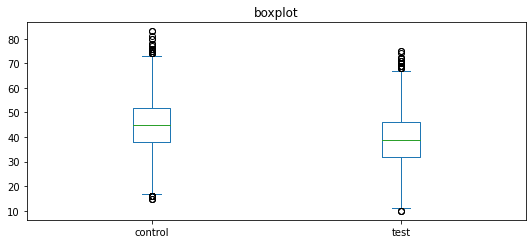

In [11]:
# 1) STD групп

import numpy as np
    
print(np.std(df_delivery.query('experiment_group == "test"').delivery_time))
print(np.std(df_delivery.query('experiment_group == "control"').delivery_time))

# 2)  Boxplot групп
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"control": df_delivery.query('experiment_group == "control"').delivery_time.dropna() \
                     , "test": df_delivery.query('experiment_group == "test"').delivery_time.dropna()})

# Plot the dataframe
ax = data[['control', 'test']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

'\n!!!!  В ОБЩЕМ Я НЕ ДОПОНЯЛ, В ИНЕТ ЧАСТО УПОМИНАЕТСЯ, ЧТО rounded данные, теряют в качестве и не могу быть \nнормально оценены на нормальность. !!!'

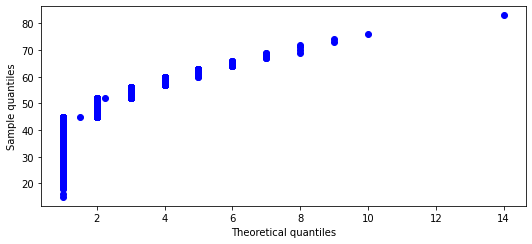

In [12]:
# 3)  предвариетльно посмотрю  QQ исходного рапср-я
import numpy as np 
import pylab 
import scipy.stats as stats
import seaborn as sns

# stats.probplot(df_delivery[df_delivery['experiment_group'] == 'test'] \
#                            ['delivery_time'], dist="norm", plot=pylab)

# stats.probplot(df_delivery[df_delivery['experiment_group'] == 'control'] \
#                            ['delivery_time'], dist="norm", plot=pylab)

# pylab.show()               






"""
!!!!  В ОБЩЕМ Я НЕ ДОПОНЯЛ, В ИНЕТ ЧАСТО УПОМИНАЕТСЯ, ЧТО rounded данные, теряют в качестве и не могу быть 
нормально оценены на нормальность. !!!"""
# Вот нашел
# 1) некий ручной способ, как оценить дискретные
# 2) можно о=апроксиммировать рапсределние , добавив jitter (шум)  и как бы приблизительно посомтреть,
# наверно есть ограничения, тратить время сейчас не буду

# взял первый спосбо

# https://stackoverflow.com/questions/59799748/qqplot-for-discrete-distribution

def discreteQQ(x_sample):
    

    p_test = np.array([])
    for i in range(0, 1001):
        p_test = np.append(p_test, i/1000)
        i = i + 1

    x_sample = np.sort(values_control)
    x_theor = stats.geom.rvs(.5, size=len(x_sample))
    ecdf_sample = np.arange(1, len(x_sample) + 1)/(len(x_sample)+1)

    x_theor = stats.geom.ppf(ecdf_sample, p=0.5)

    for p in p_test:
        plt.scatter(np.quantile(x_theor, p), np.quantile(x_sample, p), c = 'blue')

    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sample quantiles')
    plt.show()

values_control = df_delivery.query('experiment_group == "control"').delivery_time
discreteQQ(values_control)
    
#     ИТОГО
#     1) вот выглядит как не вполне нормальное распределение
#     2) часто в интернете втсречал, что дискретное нет смысла проверять, данные ужее более не нормальные
#     3) сравни с нормальном рапсредленными дискретными синтетикой!   ОСТАНОВИЛСЯ 6,3,12

' 1 ВОПРОС САША\nСаша подскажи пжлста, на практике , в таком случае какие ограничения или допущения нужно учитывать при привменении\nДжиттера для дискертных данных?'

0        44.024274
1        51.187751
2        45.792614
3        33.833758
4        43.248360
           ...    
10087    22.588143
10088    44.799554
10089    40.875091
10090    37.817967
10091    55.227663
Name: delivery_time, Length: 10092, dtype: float64

((array([-3.81287255, -3.58784659, -3.4643118 , ...,  3.4643118 ,
          3.58784659,  3.81287255]),
  array([14.97124332, 15.31982421, 15.38389322, ..., 80.55674772,
         82.57167202, 83.24658955])),
 (10.000574287011787, 45.06918419293873, 0.9998037523334535))

((array([-3.81316613, -3.58815649, -3.46463142, ...,  3.46463142,
          3.58815649,  3.81316613]),
  array([ 9.59247789,  9.74043245,  9.76719261, ..., 74.22105888,
         74.65420843, 74.91591534])),
 (9.882117623930828, 39.04326878020891, 0.9997805683229883))

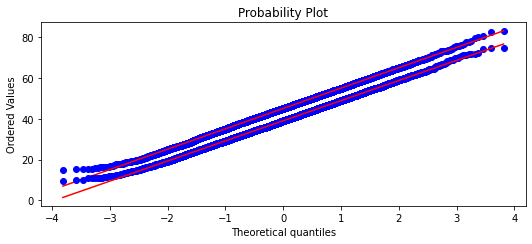

KstestResult(statistic=1.0, pvalue=0.0)

' 2 ВОПРОС САША.  N= 20! почему? в  scipy.stats.kstest.  У меня кажется общий не понятный вопрос, как то все просто \n    в учебных занятиях было, но у не доконца понял, все таки от рамзеры выборки заивсит мощность теста\n    и способность обнаружить искомое. Кажется мы не косались тема, как выбрать подходящий размер\n    выборки, когда я хочу проверить на нормальност ьчерез ШАпиро ил Колмогорова?\n    \n     Даже не смотря на замечательный ответ,который ты мне дал в Симулятор(ниже цитирую), вот использую QQ\n    плот, в данном примере, мне КАЖЕТСЯ, то рапсределние нормальное. Но не один тест его не подтвержает!!\n     Вот снизу Шапиро, не может поднятся выше 0,5 и Колмагрова выше(при N=20) вообще p = 0 показывает. \n     Данные я апроксимировал в continous, ибо Колмагорова не работает с другой шкалой(как я понял), да и в целом\n     в инете(у меня нет другого источника, мне нужна работа и наставник!!)) , сомневаются применятся   QQ,\n     Шапиро Клмагорова к диксретным (это мой исходн

0.045

NormaltestResult(statistic=0.3045157374822046, pvalue=0.8587668030718583)

NormaltestResult(statistic=6.511208196244169, pvalue=0.038557521100382505)

NormaltestResult(statistic=0.3045157374822046, pvalue=0.8587668030718583)

NormaltestResult(statistic=6.511208196244169, pvalue=0.038557521100382505)

In [13]:
# 2) можно апроксиммировать рапсределние , добавив jitter (шум)  и как бы приблизительно посомтреть,
# наверно есть ограничения, для рпименения ил трактования результат.


import random
def jitter(limit):
    '''Генератор джиттера (произвольного сдвига точек данных)'''
    return lambda x: random.uniform(-limit, limit) + x


df_delivery_jitter = df_delivery

df_delivery_jitter['delivery_time'] = df_delivery.delivery_time.apply(jitter(0.5))

df_delivery.query('experiment_group == "control"').delivery_time

# 3)  предвариетльно посмотрю  QQ исходного рапср-я
import numpy as np 
import pylab 
import scipy.stats as stats
import seaborn as sns
import scipy

stats.probplot(df_delivery_jitter.query('experiment_group == "control"').delivery_time, dist="norm", plot=pylab)

stats.probplot(df_delivery_jitter.query('experiment_group == "test"').delivery_time, dist="norm", plot=pylab)

pylab.show()               


# ИТОГО 
#  1)вообще похоже на норм, есть не значительные отклонения на хвосте.
#  2) однако когда 2 месяца назад я эксперементировал и убирал часть упорядоченных данных в начале или конце 
#      (outlires) , то получал более ненормальное рапсределение. Возможно я не учел упорядоченность 
#     значений квантилей 1 2 3 стн отклоения при      построенииQQ 

# ***How does QQ work?
# We plot the theoretical quantiles or basically known as the standard normal variate (a normal distribution with mean=0 and standard deviation=1)on the x-axis and the ordered values for the random variable which we want to find whether it is Gaussian distributed or not, on the y-axis
# https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0

# 3)  НО, ktest не показывает подтверждения номарльность ( выборками N = 20),даже с данными джитера
scipy.stats.kstest(df_delivery_jitter.query('experiment_group == "control"').delivery_time, cdf = 'norm')
# scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', method='auto')




In [ ]:
# распределние значение 90%выборочных квантилей CONTROL

sample_size = 10000
n = sample_size    # размер исходной выборки
B = 1000           # количество генерируемых подвыборок
alpha = 0.05

values_a = df_delivery.query('experiment_group == "control"').delivery_time

bootstrap_values_a = np.random.choice(values_a, (B, n), True)
bootstrap_metrics_a = np.quantile(bootstrap_values_a, 0.9, axis=1)
sns.distplot(bootstrap_metrics_a, kde = False)

In [ ]:
# распределние значение 90%выборочных квантилей   TEST

sample_size = 10000
n = sample_size    # размер исходной выборки
B = 1000           # количество генерируемых подвыборок
alpha = 0.05

values_a = df_delivery.query('experiment_group == "test"').delivery_time

bootstrap_values_a = np.random.choice(values_a, (B, n), True)
bootstrap_metrics_a = np.quantile(bootstrap_values_a, 0.9, axis=1)
sns.distplot(bootstrap_metrics_a, kde = False)


In [ ]:
# Предполагается, если данных много, то, независимо от распределения исходных данных ( дисперсия есть и не равна нулю),
# по центральной предельной теореме СРЕДНЕЕ! будет распределено нормально.
# Для норм распределённых статистик ДИ можно вычислить по формуле:
# mean - z(1-a/2)*std, mean + z(1-a/2)*std  *все значения выборорчные

#  1)Нормальный доверительный интервал отлично подходит, когда распределение статистики близко 
# к нормальному распределению - но это не наш случай видимо

# 2)  есть центральный доверительный интервал

# 3)В случае несимметричных распределений мы можем использовать перцентильный доверительный
# интервал - использую этот





def get_percentile_ci(bootstrap_stats, pe, alpha):
    """Строим перцентильный доверительный интервал."""
    left, right = np.quantile(bootstrap_stats, [alpha / 2, 1 - alpha / 2])
    return left, right

In [ ]:
sample_size = 10000
n = sample_size    # размер исходной выборки
B = 1000           # количество генерируемых подвыборок
alpha = 0.05

values_a = df_delivery.query('experiment_group == "control"').delivery_time

values_b = df_delivery.query('experiment_group == "test"').delivery_time


pe = np.quantile(values_b, 0.9) - np.quantile(values_a, 0.9)
bootstrap_values_a = np.random.choice(values_a, (B, n), True)
bootstrap_metrics_a = np.quantile(bootstrap_values_a, 0.9, axis=1)
bootstrap_values_b = np.random.choice(values_b, (B, n), True)
bootstrap_metrics_b = np.quantile(bootstrap_values_b, 0.9, axis=1)
bootstrap_stats = bootstrap_metrics_b - bootstrap_metrics_a
ci = get_percentile_ci(bootstrap_stats, pe, alpha)
has_effect = not (ci[0] < 0 < ci[1])

print(f'Значение 90% квантиля изменилось на: {pe:0.2f}')
print(f'{((1 - alpha) * 100)}% доверительный интервал: ({ci[0]:0.2f}, {ci[1]:0.2f})')
print(f'Отличия статистически значимые: {has_effect}')

In [ ]:
# ИТОГО
#     мы видим измение(сокращение) времени доставки для Подавляющего большиства клиентов, 
#     в тесте, на 6 минут.  Сама величина является статистически значимой, новый алгоритм
#     доставке, на этих данных(sic!), с этим дизайном теста(sic!) и используемой 
#     статистикой(sic!), улучил показатели  выбранной метрики.
#     Покаатим новый алгоритм на всех или последователно на большую часть популяции,
#     так как  время доставки (90% от общего колл-ва )статистически значимо изменилось.
#       Конечно еще бы посмотреть значения  Informative Guardrail метрик, но данная 
#       работа носит гипотетический и показательный характер.


# Благодарю за чтение и желаю хорошего дня!
